# Weightloss

In [1]:
from __future__ import division
from math import log
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

/Users/Lehner/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Problem 1

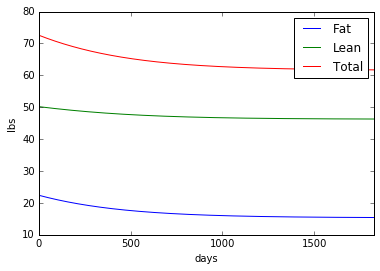

In [2]:
#Fixed constants:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = 0.14 # Adaptive Thermogenesis beta_TEF = 0.1 # Thermic Effect of Feeding 
K=0

def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F , p * EB / rho_L])

def fat_mass(BW, age, H, sex): 
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

def RK4_n(y, y0, a, b, h, plot=False):
    n = int((b-a) / h) + 1
    x_list = np.linspace(a,b,n)
    y_approx = np.zeros((n,len(y0)))
    y_approx[0] = y0
    for i in xrange(n-1):
        k1 = y(x_list[i], y_approx[i])
        k2 = y(x_list[i] + (h/2.), y_approx[i] + (h/2.)*k1)
        k3 = y(x_list[i] + (h/2.), y_approx[i] + (h/2.)*k2)
        k4 = y(x_list[i+1], y_approx[i] + h*k3)
        y_approx[i+1] = y_approx[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    if plot==True:
        plt.plot(x_list, y_approx[:,0])
        plt.plot(x_list, y_approx[:,1])
        plt.plot(x_list, y_approx[:,0] + y_approx[:,1])
    return y_approx

BW = 72.5748
age = 38
H = 1.7272
sex = 'female'
F0 = fat_mass(BW, age, H, sex)
L0 = BW - F0 

EI = 2025.
PAL = 1.5

y0 = np.array([F0, L0])
y = lambda x, y : weight_odesystem(x, y, EI, PAL)
RK4_n(y, y0, 0, 1825, 1., plot=True)
plt.xlabel('days')
plt.xlim(0,1825)
plt.ylabel('lbs')
plt.legend(['Fat', 'Lean', 'Total'], loc=1)
plt.show()

### Problem 2

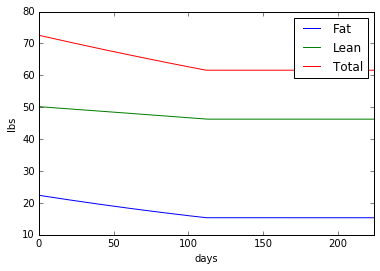

In [3]:
def y(x, y):
    if x < 16*7:
        EI = 1600
        PAL = 1.7
        return weight_odesystem(x, y, EI, PAL)
    elif x >= 16*7:
        EI = 2025
        PAL = 1.5
        return weight_odesystem(x, y, EI, PAL)



RK4_n(y, y0, 0, 32*7, 1., plot=True)
plt.xlabel('days')
plt.xlim(0,32*7)
plt.ylabel('lbs')
plt.legend(['Fat', 'Lean', 'Total'], loc=1)
plt.show()

### Problem 3

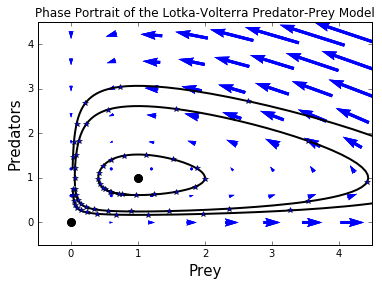

In [4]:
Y = [np.array([1 / 2., 3 / 4.]), np.array([1 / 16., 3 / 4.]),  np.array([1 / 40., 3 / 4.])] 

for y0 in Y:
    a, b = 0., 13.
    alpha = 1. / 3
    dim = 2
      
    # Note: swapping order of arguments to match the calling convention
    # used in the built in IVP solver.
    def Lotka_Volterra(y, x):
        return np.array([y[0] * (1. - y[1]), alpha * y[1] * (y[0] - 1.)])

    subintervals = 200
    # Using the built in ode solver
    Y = odeint(Lotka_Volterra, y0, np.linspace(a, b, subintervals))

    # Plot the direction field
    Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
    U, V = Lotka_Volterra((Y1, Y2), 0)

     
    Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
    # Plot the 2 Equilibrium points
    plt.plot(1, 1, 'ok', markersize=8) 
    plt.plot(0, 0, 'ok', markersize=8)
    # Plot the solution in phase space 
    plt.plot(Y[:,0], Y[:,1], '-k', linewidth=2.0) 
    plt.plot(Y[::10,0], Y[::10,1], '*b')
    plt.axis([-.5, 4.5, -.5, 4.5])
    plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model") 
    plt.xlabel('Prey',fontsize=15)
    plt.ylabel('Predators',fontsize=15)
plt.show()

### Problem 4

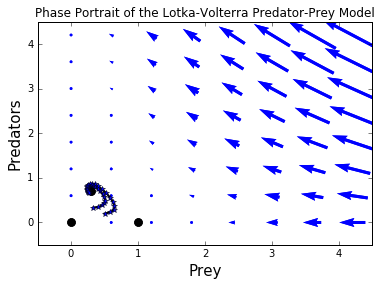

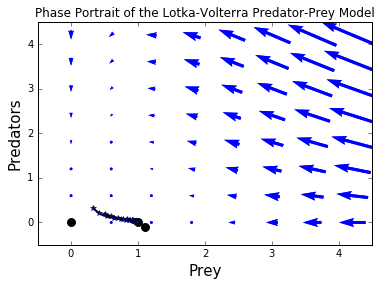

In [5]:
Y_list = [np.array([1 / 3., 1 / 3.]), np.array([1 / 2., 1 / 5.])] 
Pairs = [(1., .3), (1., 1.1)]

for alpha, beta in Pairs:
    for y0 in Y_list:
        a, b = 0., 13.
        dim = 2
          
        # Note: swapping order of arguments to match the calling convention
        # used in the built in IVP solver.
        def Lotka_Volterra(y, x):
            return np.array([y[0] * (1. - y[0] - y[1]), alpha * y[1] * (y[0] - beta)])

        subintervals = 200
        # Using the built in ode solver
        Y = odeint(Lotka_Volterra, y0, np.linspace(a, b, subintervals))

        # Plot the direction field
        Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
        U, V = Lotka_Volterra((Y1, Y2), 0)

         
        Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
        # Plot the 3 Equilibrium points
        plt.plot(1, 0, 'ok', markersize=8) 
        plt.plot(0, 0, 'ok', markersize=8)
        plt.plot(beta, (1-beta), 'ok', markersize=8)
        # Plot the solution in phase space 
        plt.plot(Y[:,0], Y[:,1], '-k', linewidth=2.0) 
        plt.plot(Y[::10,0], Y[::10,1], '*b')
        plt.axis([-.5, 4.5, -.5, 4.5])
        plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model") 
        plt.xlabel('Prey',fontsize=15)
        plt.ylabel('Predators',fontsize=15)
    plt.show()